In [1]:
!pip install tensorflow matplot streamlit numpy pandas manim

  Using cached matplot-0.1.9-py2.py3-none-any.whl.metadata (241 bytes)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl.metadata (806 bytes)
  Using cached pyloco-0.0.139-py2.py3-none-any.whl.metadata (1.1 kB)
INFO: pip is looking at multiple versions of streamlit to determine which version is compatible with other requirements. This could take a while.
  Using cached streamlit-1.32.2-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached streamlit-1.32.1-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached streamlit-1.32.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached streamlit-1.31.1-py2.py3-none-any.whl.metadata (8.1 kB)
  Using cached importlib_metadata-7.1.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached streamlit-1.31.0-py2.py3-none-any.whl.metadata (8.1 kB)
  Using cached streamlit-1.30.0-py2.py3-none-any.whl.metadata (8.2 kB)
  Using cached streamlit-1.29.0-py2.py3-none-any.whl.metadata (8.2 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.4 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers


imported all the neccessary libraries here

In [3]:
data_train_path="Fruits_Vegetables/train"
data_test_path="Fruits_Vegetables/test"
data_val_path="Fruits_Vegetables/validation"


set the path of each train , test and validate folder

In [4]:
img_width=180
img_height=180

scaled the images to 180x180 to make it uniform 

In [5]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


validation set is false coz we dont have to split our dataset we already have a validation set 

In [6]:
data_cat=data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


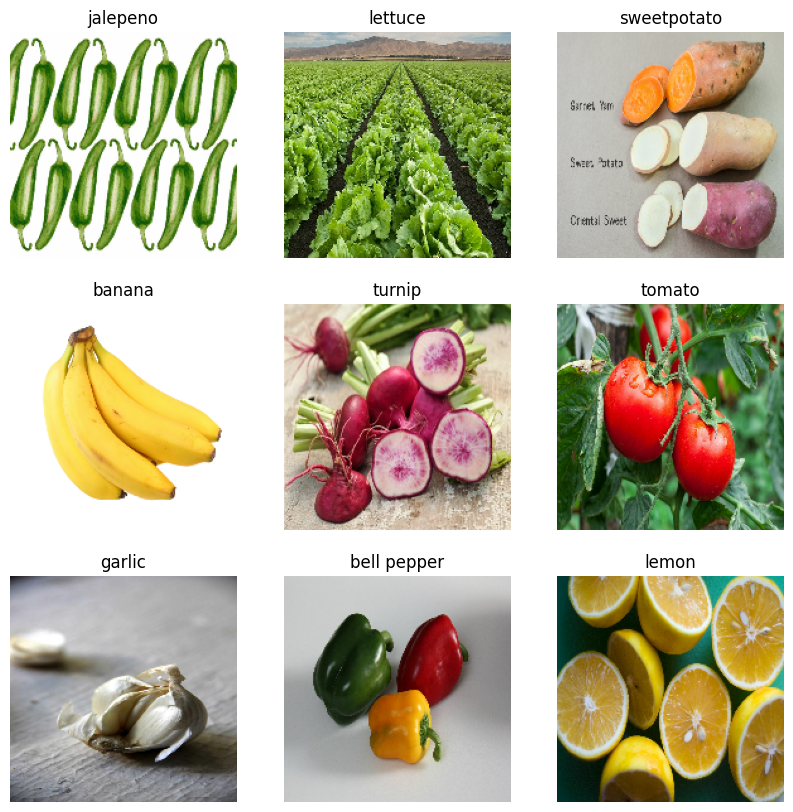

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

So here we see the images whicha are there 

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

180x180 is height of photo and 3 is for rgb

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 35s 185ms/step - loss: 3.2038 - accuracy: 0.1185 - val_loss: 2.2184 - val_accuracy: 0.3846
Epoch 2/25
98/98 [==============================] - 17s 160ms/step - loss: 2.3565 - accuracy: 0.3185 - val_loss: 1.6110 - val_accuracy: 0.5242
Epoch 3/25
98/98 [==============================] - 17s 161ms/step - loss: 1.8535 - accuracy: 0.4571 - val_loss: 0.9253 - val_accuracy: 0.7692
Epoch 4/25
98/98 [==============================] - 17s 160ms/step - loss: 1.2945 - accuracy: 0.6119 - val_loss: 0.9455 - val_accuracy: 0.7094
Epoch 5/25
98/98 [==============================] - 19s 178ms/step - loss: 0.8328 - accuracy: 0.7586 - val_loss: 0.5081 - val_accuracy: 0.8889
Epoch 6/25
98/98 [==============================] - 17s 161ms/step - loss: 0.4802 - accuracy: 0.8661 - val_loss: 0.3981 - val_accuracy: 0.9231
Epoch 7/25
98/98 [==============================] - 17s 154ms/step - loss: 0.3174 - accuracy: 0.9108 - val_loss: 0.4019 - val_accuracy: 0.9259

98 is number of batches 

Text(0.5, 1.0, 'Loss')

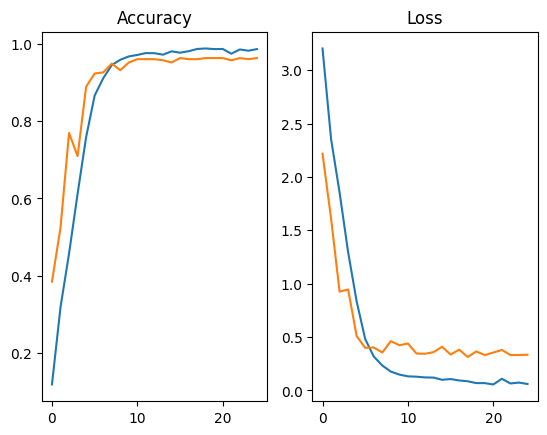

In [16]:
epochs_range=range(epochs_size)
plt.figure(figure=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

UsageError: Cell magic `%%manim` not found.


In [17]:
image="banana.jpg"
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

ValueError: Attempt to convert a value (<PIL.Image.Image image mode=RGB size=180x180 at 0x1C9010DFFD0>) with an unsupported type (<class 'PIL.Image.Image'>) to a Tensor.

In [20]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [21]:
score=tf.nn.softmax(predict)

In [22]:
print('Veg/Fruit in image is {} with accuracy of{:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is banana with accuracy of99.65


In [21]:
model.save('imageclassification.keras')

In [18]:
import json

# Example: Saving history data to a JSON file
history_data = {
    "accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open('training_history.json', 'w') as f:
    json.dump(history_data, f)
